# House Value Prediction Model Selection
This notebook is used to perform Model Selection on the dataset provided by the real estate agency\
Each model used in this notebook is instantiated using the default parameters\
The evaluation metrics used are:
1. Root Mean Square Error (**RMSE**)
2. Mean Absolute Percentage Error (**MAPE**)

# Install Dependecies

In [1]:
%pip install pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


# Load the Training Dataset

In [ ]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split

dataset_path = Path("../../dataset/processed/California_Houses_Processed.csv") # Change this to the path of your dataset

houses_df = pd.read_csv(dataset_path)

# Training Data
x = houses_df.drop(columns=["Median_House_Value"], inplace=False)
# Target (Label)
y = houses_df["Median_House_Value"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


print(f'Dataset shape: {houses_df.shape}')
print(f'X train shape: {x_train.shape}')
print(f'Y train shape: {y_train.shape}')

houses_df["Median_House_Value"].describe()

Dataset shape: (20640, 16)
X train shape: (16512, 15)
Y test shape: (16512,)


count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: Median_House_Value, dtype: float64

# Load the Data Preprocessing Pipeline

In [3]:
import os
import sys

module_path = os.path.abspath(os.path.join('..','..', 'scripts'))

if module_path not in sys.path:
    sys.path.append(module_path)

print(sys.path)

from data_preprocessing import get_preprocessing_pipeline

preprocessing_pipeline = get_preprocessing_pipeline()

print(preprocessing_pipeline)

['C:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python312\\python312.zip', 'C:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python312\\DLLs', 'C:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python312\\Lib', 'C:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python312', 'c:\\Users\\Admin\\Desktop\\House-Value-Prediction\\.venv', '', 'c:\\Users\\Admin\\Desktop\\House-Value-Prediction\\.venv\\Lib\\site-packages', 'c:\\Users\\Admin\\Desktop\\House-Value-Prediction\\.venv\\Lib\\site-packages\\win32', 'c:\\Users\\Admin\\Desktop\\House-Value-Prediction\\.venv\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\Admin\\Desktop\\House-Value-Prediction\\.venv\\Lib\\site-packages\\Pythonwin', 'c:\\Users\\Admin\\Desktop\\House-Value-Prediction\\scripts']
Pipeline(steps=[('impute', SimpleImputer()),
                ('column transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log transformation',
                     

# Linear Regression Model (The Baseline)
We going to use a simple **Linear Regression Model** as the baseline

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import pandas as pd

lin_reg = make_pipeline(preprocessing_pipeline, LinearRegression())

lin_reg_rmse = -cross_val_score(lin_reg, x_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
lin_reg_mape = -cross_val_score(lin_reg, x_train, y_train, scoring="neg_mean_absolute_percentage_error", cv=10)


print(pd.Series(lin_reg_rmse).describe(), end="\n\n")
print(pd.Series(lin_reg_mape).describe())


count       10.000000
mean     70392.697413
std       2425.402952
min      67625.431537
25%      68344.591427
50%      69835.057726
75%      72299.077396
max      74505.783715
dtype: float64

count    10.000000
mean      0.322158
std       0.008791
min       0.305502
25%       0.316849
50%       0.321716
75%       0.329786
max       0.332899
dtype: float64


# Decision Tree Model

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import pandas as pd

decision_tree = make_pipeline(preprocessing_pipeline, DecisionTreeRegressor(random_state=42))

decision_tree_rmse = -cross_val_score(decision_tree, x_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
decision_tree_mape = -cross_val_score(decision_tree, x_train, y_train, scoring="neg_mean_absolute_percentage_error", cv=10)

print(pd.Series(decision_tree_rmse).describe(), end="\n\n")
print(pd.Series(decision_tree_mape).describe())

count       10.000000
mean     64971.675609
std       3228.471197
min      60458.640609
25%      63156.821136
50%      64564.355163
75%      66854.462546
max      71251.552471
dtype: float64

count    10.000000
mean      0.219764
std       0.010598
min       0.206445
25%       0.211668
50%       0.220984
75%       0.224403
max       0.242037
dtype: float64


# KNN Model

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import pandas as pd

knn = make_pipeline(preprocessing_pipeline, KNeighborsRegressor())
knn_rmse = -cross_val_score(knn, x_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
knn_mape = -cross_val_score(knn, x_train, y_train, scoring="neg_mean_absolute_percentage_error", cv=10)


print(pd.Series(knn_rmse).describe(), end="\n\n")
print(pd.Series(knn_mape).describe())

count       10.000000
mean     56934.594711
std       1501.691813
min      55051.995309
25%      55865.788209
50%      56767.780669
75%      58021.926180
max      59137.508071
dtype: float64

count    10.000000
mean      0.202048
std       0.005286
min       0.194073
25%       0.197858
50%       0.204268
75%       0.206317
max       0.207618
dtype: float64


# SVM Model

In [7]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import pandas as pd

svm = make_pipeline(preprocessing_pipeline, SVR())
svm_rmse = -cross_val_score(svm, x_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
svm_mape = -cross_val_score(svm, x_train, y_train, scoring="neg_mean_absolute_percentage_error", cv=10)


print(pd.Series(svm_rmse).describe(), end="\n\n")
print(pd.Series(svm_mape).describe())

count        10.000000
mean     118491.276748
std        2126.886412
min      114442.265248
25%      117136.059800
50%      119415.092264
75%      119663.084555
max      121312.879189
dtype: float64

count    10.000000
mean      0.523741
std       0.014123
min       0.497916
25%       0.519682
50%       0.525412
75%       0.532236
max       0.545556
dtype: float64


# Random Forest Model

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import pandas as pd

random_forest = make_pipeline(preprocessing_pipeline, RandomForestRegressor(random_state=42, n_jobs=-1)) # n_jobs=-1 means using all processors

random_forest_rmse = -cross_val_score(random_forest, x_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
random_forest_mape = -cross_val_score(random_forest, x_train, y_train, scoring="neg_mean_absolute_percentage_error", cv=10)


print(pd.Series(random_forest_rmse).describe(), end="\n\n")
print(pd.Series(random_forest_mape).describe())

count       10.000000
mean     46060.226282
std       1941.880320
min      43025.709777
25%      44485.685539
50%      46519.149493
75%      47401.716032
max      48741.739114
dtype: float64

count    10.000000
mean      0.160933
std       0.006316
min       0.149174
25%       0.158761
50%       0.162356
75%       0.166173
max       0.166634
dtype: float64


# Results
After comparing the **RMSE** and the **MAPE** of all considered models, we decided to implement the House Value Prediction System using a **Random Forest Model**

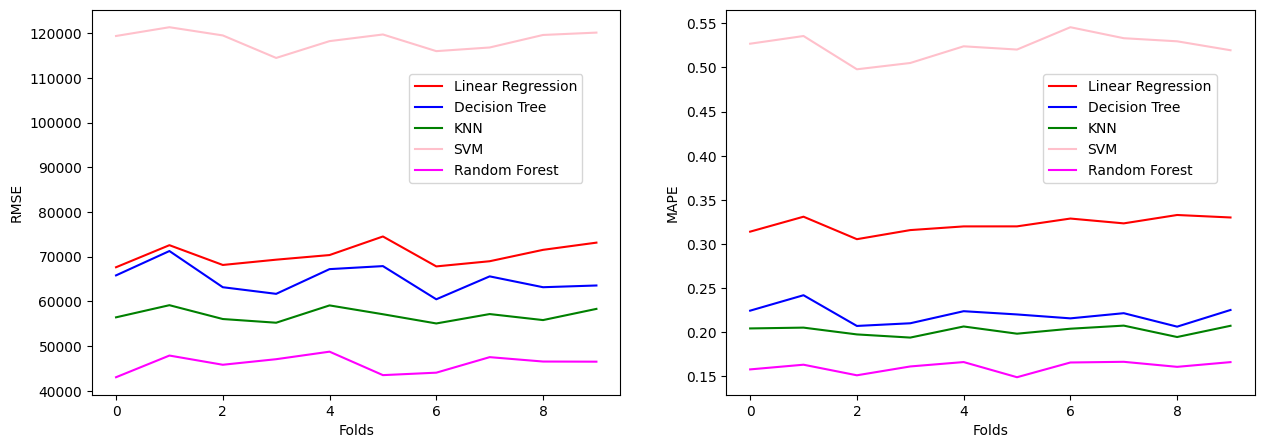

In [9]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

ax1.plot(lin_reg_rmse, "red", label="Linear Regression")
ax1.plot(decision_tree_rmse, "blue", label="Decision Tree")
ax1.plot(knn_rmse, "green", label="KNN")
ax1.plot(svm_rmse, "pink", label="SVM")
ax1.plot(random_forest_rmse, "magenta", label="Random Forest")
ax1.legend(loc=(0.6,0.55))
ax1.set_xlabel("Folds")
ax1.set_ylabel("RMSE")

ax2.plot(lin_reg_mape, "red", label="Linear Regression")
ax2.plot(decision_tree_mape, "blue", label="Decision Tree")
ax2.plot(knn_mape, "green", label="KNN")
ax2.plot(svm_mape, "pink", label="SVM")
ax2.plot(random_forest_mape, "magenta", label="Random Forest")
ax2.legend(loc=(0.6,0.55))
ax2.set_xlabel("Folds")
ax2.set_ylabel("MAPE")
plt.show()